Импорт библиотек

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
import math

Создание таблицы

In [ ]:
dct={"x":[(0,10),(10,20),(20,30),(30,40),(40,50),"Итого"],(0,250):[20,10,0,0,0,30],(250,500):[10,22,20,10,0,62],(500,750):[0,18,57,21,0,96],(750,1000):[0,0,23,30,12,65],(1000,1250):[0,0,0,19,28,47],"Итого":[30,50,100,80,40,300]}
data=pd.DataFrame(dct)

показ получившейся таблицы

In [ ]:
data


,x,"(0, 250)","(250, 500)","(500, 750)","(750, 1000)","(1000, 1250)",Итого
0,"(0, 10)",20,10,0,0,0,30
1,"(10, 20)",10,22,18,0,0,50
2,"(20, 30)",0,20,57,23,0,100
3,"(30, 40)",0,10,21,30,19,80
4,"(40, 50)",0,0,0,12,28,40
5,Итого,30,62,96,65,47,300


In [ ]:
y_mean=list()
x_mean=list()
for i in data.columns[1:-1]:
  x_mean.append(np.mean(i))
y_mean=[(j[0]+j[1])//2 for j in data["x"][:-1]]
x_mean=np.array(x_mean)
y_mean=np.array(y_mean)

вычисление групповых средних y на x

In [ ]:
x_on_y=list()
for i, row in data.iterrows():
  x_on_y.append(np.sum(np.array(row[1:-1])*x_mean/row[-1]))


x_on_y.pop()



655.8333333333334

In [ ]:
y_on_x=list()
for values in data.drop(['x','Итого'],axis=1).columns:
  t=np.array((data[values]))
  y_on_x.append ( np.sum(t[:-1]*y_mean/t[len(t)-1]))

Эмпирическая линия регрессии y по x

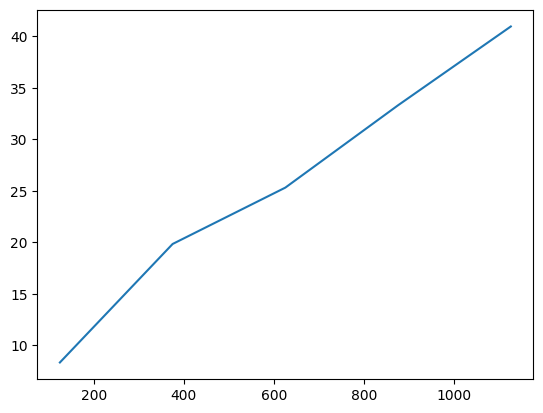

In [ ]:
plt.plot(x_mean,y_on_x)

Эмпирическая линия регрессии x по y

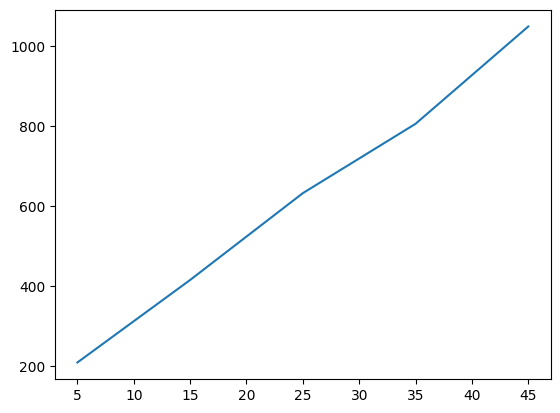

In [ ]:
plt.plot(y_mean,x_on_y)

Вычисление среднего у

In [ ]:
y_main_mean=np.sum(np.array(data.iloc[5][1:-1])*y_mean/np.sum(data.iloc[5][1:-1]))

Вычисление среднего квадратов у

In [ ]:
y_main_mean_quad=np.sum(np.array(data.iloc[5][1:-1])*y_mean**2/np.sum(data.iloc[5][1:-1]))

Вычисление среднего х

In [ ]:
x_main_mean=np.sum(np.array(data["Итого"][:-1])*x_mean/data["Итого"][len(data["Итого"])-1])

Вычисление среднего квадратов х

In [ ]:
x_main_mean_quad=np.sum(np.array(data["Итого"][:-1])*x_mean**2/data["Итого"][len(data["Итого"])-1])

Вычисление среднего произведения

In [ ]:
sub_data=data.drop(columns=['x',"Итого"])
sum=0
for i in range(len(x_mean)):
  for j in range(len(y_mean)):
    sum+=sub_data.iloc[i,j]*x_mean[i]*y_mean[j]
sum/=data['Итого'][len(data['Итого'])-1]

In [ ]:
byx=(sum-x_main_mean*y_main_mean)/(x_main_mean_quad-x_main_mean**2)
bxy=(sum-x_main_mean*y_main_mean)/(y_main_mean_quad-y_main_mean**2)

теоритически рассчитанная линия регресии x по у

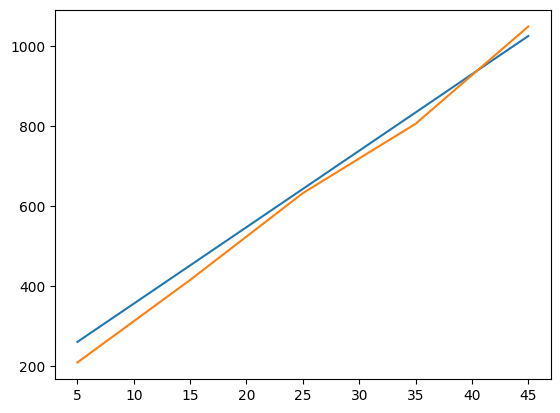

In [ ]:
for_bxy=list()
for i in range(len(y_mean)):
  for_bxy.append(bxy*(y_mean[i]-y_main_mean)+x_main_mean)
plt.plot(y_mean,for_bxy);
plt.plot(y_mean,x_on_y)

Теоритически рассчитанная регрессия у по x

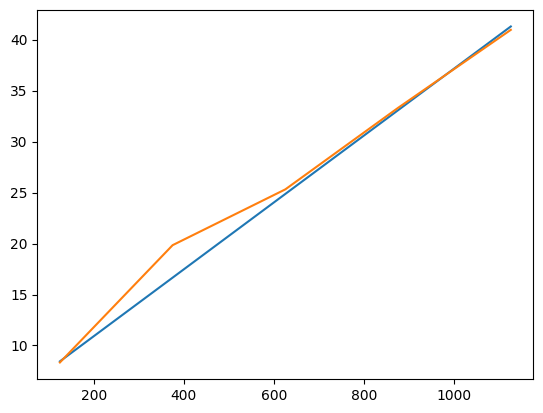

In [ ]:
for_byx=list()
for i in range(len(x_mean)):
  for_byx.append(byx*(x_mean[i]-x_main_mean)+y_main_mean)
plt.plot(x_mean,for_byx);
plt.plot(x_mean,y_on_x);

Рассчет выборочного коэффициента корреляции

In [ ]:
import math
r=math.sqrt(bxy*byx)
print(r)

0.79324440571997


Проверка гипотезы

In [ ]:
k=data['Итого'][len(data['Итого'])-1]-2
t=r*math.sqrt(k)/math.sqrt(1-r**2)
alfa=1-.05
t_kr=scipy.stats.t.ppf(alfa,k)
if math.fabs(t)>t_kr:
  print("линейная завимость есть")
else:
  print("линейной зависимости нет")

линейная завимость есть
